# General Assembly Capstone: Time Series Forecasting of Texas Electricity Data
----

## <span style="color:Green">01 - Preprocessing - Merging & Cleaning 2014 Data</span>      
----

### Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the data

Source data can be found at http://www.ercot.com/gridinfo/generation

In [2]:
df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2014.xls', sheet_name = None)

In [3]:
df.keys()

dict_keys(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'])

## 2. Clean the data

#### Combine all the sheets into one dataframe

In [4]:
cdf = pd.concat(df,sort=False)

In [5]:
cdf.head()

Date-Fuel          Total     00:15:00     00:30:00     00:45:00  \
Dec 0  12/01/14_Biomass    1313.070826    12.891322    12.895332    12.902462   
    1     12/01/14_Coal  284945.477800  2359.614483  2300.492164  2247.898792   
    2      12/01/14_Gas   28340.945993   223.362513   223.336012   221.599643   
    3   12/01/14_Gas-CC  322647.916165  1403.461706  1374.147488  1339.859555   
    4    12/01/14_Hydro     348.353841     2.460709     2.422394     2.412637   

          01:00:00     01:15:00     01:30:00     01:45:00     02:00:00  ...  \
Dec 0    12.915320    12.890127    12.900995    12.904399    12.913821  ...   
    1  2146.232278  2030.426716  1936.338007  1871.713917  1849.131324  ...   
    2   222.240141   221.774384   222.190662   221.488626   222.136775  ...   
    3  1353.597552  1342.888265  1346.616605  1349.380121  1358.379343  ...   
    4     2.422935     2.537908     2.652136     2.637553     2.549453  ...   

          00:00:00  DST1  DST2  DST3  DST4  1900-01-01 00:00:00  dst1  dst2  \
Dec 0    18.719430   NaN   NaN   NaN   NaN                  NaN   NaN   NaN   
    1  3499.323440   NaN   NaN   NaN   NaN                  NaN   NaN   NaN   
    2   231.738239   NaN   NaN   NaN   NaN                  NaN   NaN   NaN   
    3  3928.487110   NaN   NaN   NaN   NaN                  NaN   NaN   NaN   
    4     1.257780   NaN   NaN   NaN   NaN                  NaN   NaN   NaN   

       dst3  dst4  
Dec 0   NaN   NaN  
    1   NaN   NaN  
    2   NaN   NaN  
    3   NaN   NaN  
    4   NaN   NaN  

[5 rows x 107 columns]

#### The 'Date-Fuel' column contains data we need, so let's separate them

In [6]:
cdf.rename(columns = {'Date-Fuel': 'fuel'}, inplace=True)

cdf[['Date', 'Fuel']] = cdf.fuel.str.split("_", expand=True)

#### Select only the date, fuel type, and total electricity generated by fuel type for that day as new dataframe

In [9]:
full_df = cdf[['Date', 'Fuel', 'Total']]

In [10]:
full_df.head()

Date     Fuel          Total
Dec 0  12/01/14  Biomass    1313.070826
    1  12/01/14     Coal  284945.477800
    2  12/01/14      Gas   28340.945993
    3  12/01/14   Gas-CC  322647.916165
    4  12/01/14    Hydro     348.353841

#### Transpose the data such that the energy sources are columns and every row is a unique day throughout the year

In [13]:
# https://stackoverflow.com/questions/66792082/pandas-python-how-to-transpose-duplicate-rows-to-columns-and-preserve-order
order = full_df['Date'].unique()
full_df = full_df.set_index([full_df.groupby('Fuel').cumcount(), 'Fuel'])['Total'].unstack()

#### Because we lost the data columns while transposing, create a new daily date column and set it as the index

In [14]:
# https://datascience.stackexchange.com/questions/48335/how-to-add-date-column-in-python-pandas-dataframe
full_df['date'] = pd.date_range(start='2014-01-01', periods=len(full_df), freq='D')

In [15]:
full_df.head()

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind,date
0,1313.070826,284945.477800,28340.945993,322647.916165,348.353841,123022.128288,19.661911,399.330900,110907.963275,2014-01-01
1,1192.787292,322981.773347,28621.473032,394119.254099,461.974223,122136.741274,12.476084,469.903770,73469.649870,2014-01-02
2,1164.949000,303085.941670,33237.120022,310780.164724,349.734030,123168.152762,22.337171,315.652973,72372.497484,2014-01-03
3,1120.958881,302705.792925,22216.230466,254160.002124,305.779660,123118.710126,27.543474,298.699361,99895.491801,2014-01-04
4,1143.968422,300451.546650,21096.570287,257942.096694,330.278688,122752.638526,2.152364,600.820685,102832.372830,2014-01-05


#### Now, let's set our newly created 'date' column as our index

In [16]:
full_df = full_df.set_index('date')

In [17]:
full_df.head()

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind
date,,,,,,,,,
2014-01-01,1313.070826,284945.477800,28340.945993,322647.916165,348.353841,123022.128288,19.661911,399.330900,110907.963275
2014-01-02,1192.787292,322981.773347,28621.473032,394119.254099,461.974223,122136.741274,12.476084,469.903770,73469.649870
2014-01-03,1164.949000,303085.941670,33237.120022,310780.164724,349.734030,123168.152762,22.337171,315.652973,72372.497484
2014-01-04,1120.958881,302705.792925,22216.230466,254160.002124,305.779660,123118.710126,27.543474,298.699361,99895.491801
2014-01-05,1143.968422,300451.546650,21096.570287,257942.096694,330.278688,122752.638526,2.152364,600.820685,102832.372830


#### Let's combine 'Gas' & 'Gas-CC' as one column - 'NGas' for natural gas

In [18]:
full_df['NGas'] = full_df['Gas'] + full_df['Gas-CC']
full_df.drop(columns = ['Gas', 'Gas-CC'], inplace = True)

## 3. Visualize the Data

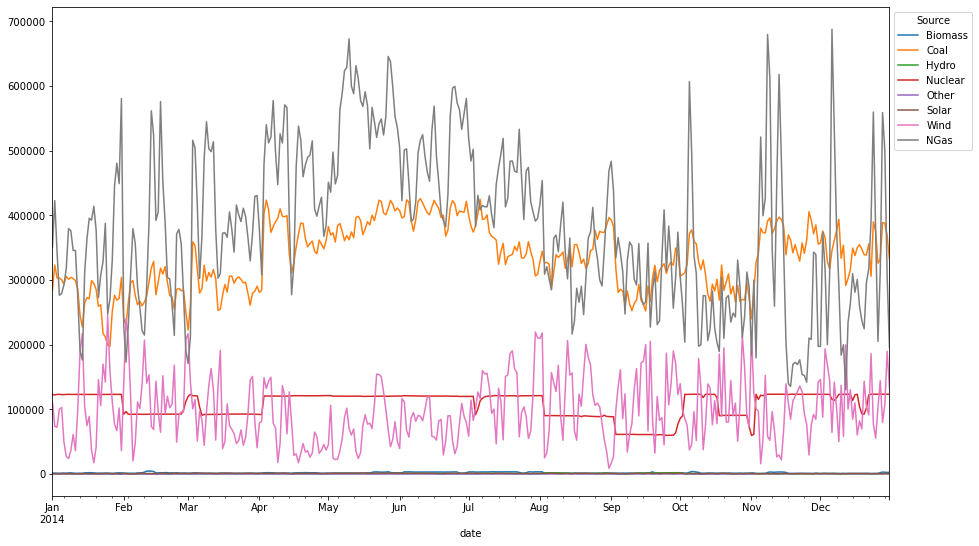

In [19]:
full_df.plot(figsize=(15,9)).legend(title='Source', bbox_to_anchor=(1, 1));


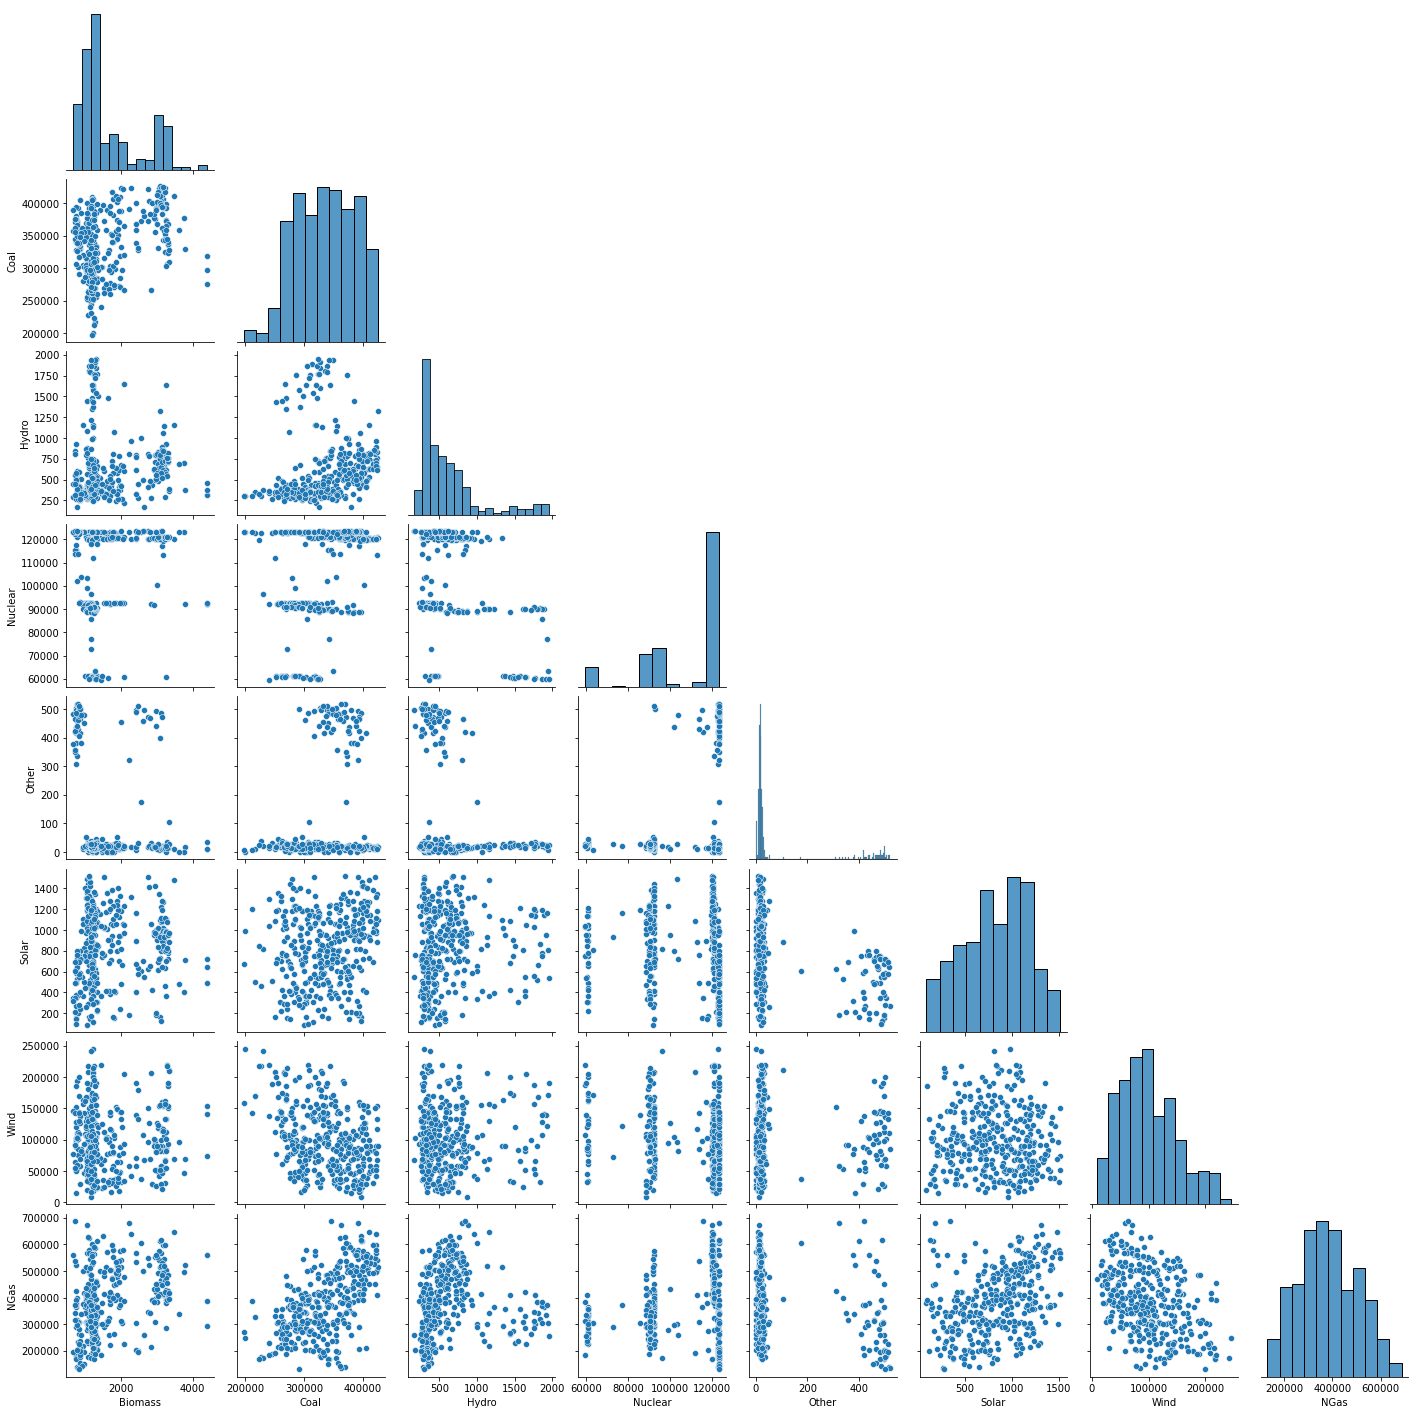

In [20]:
sns.pairplot(full_df, corner=True)

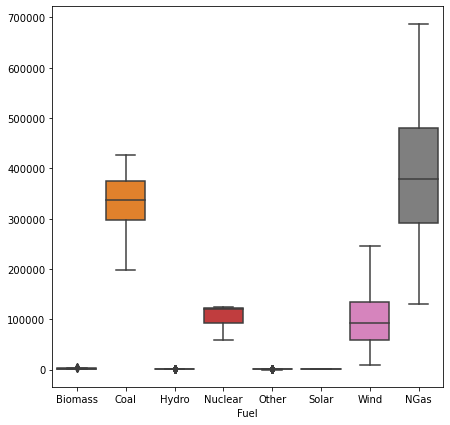

In [24]:
plt.figure(figsize=(7,7))
sns.boxplot(data = full_df,
            
            );


#### Natural gas and coal continue to dominate generation with wind beginning to show signs of increasing.

### Export the cleaned data

In [23]:
full_df.to_csv('../../data/final_dfs/2014_clean.csv')